<a href="https://colab.research.google.com/github/CamachoDiego/Parcial1SyS/blob/main/Parcial1DiegoAndresCamachoClaros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pregunta 2:

Cuál es la señal obtenida en tiempo discreto al utilizar un conversor análogo digital con frecuencia de muestreo de $5kHz$, aplicado a la señal continua $x(t) = 3 \cos(1000\pi t) +
5 \sin(2000\pi t) + 10 \cos(11000\pi t)$?.


### Solución:

Se reemplaza $t$ en continuo por la discretización $t=nT_s$, con $n\in\mathbb{Z}$:

$x[t = nT_s] = 3\cos[1000\pi n T_s]+ 5\sin[2000\pi n T_s] + 10\cos[11000\pi n T_s],$

teniendo en cuenta que:

$T_s = \frac{1}{F_s} = \frac{1}{5000} [s].$

Ahora:


$x[n] = 3\cos[1000\pi n/5000]+ 5\sin[2000\pi n/5000] + 10\cos[11000\pi n / 5000]$

$x[n] = 3\cos[\pi n/5] + 5\sin[2\pi n/5] + 10 \cos[11\pi n /5]$

$\Omega_3 = 11\pi/5 > \pi,$ frecuencia copia!

Para estimar la frecuencia original:

$\boxed{\hat{\Omega}_3 = \Omega_3 - 2\pi = 11\pi/5 -2\pi = \pi/5}$

Reemplazando en la función discretizada:


$x[n] = 3\cos[\pi n/5] + 5\sin[2\pi n/5] + 10 \cos[\pi n /5]$

Tenemos que:

$\boxed{x[n] = 13\cos[\pi n /5]+ 5 \sin[2\pi n /5]}$


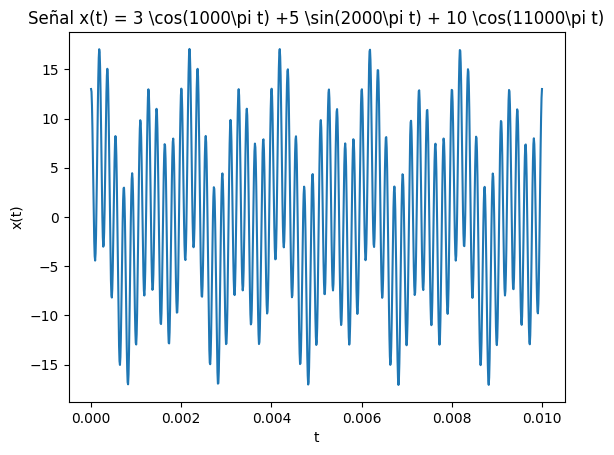

In [1]:
# graficar la señal
import numpy as np
import matplotlib.pyplot as plt

# Definir la señal
t=np.linspace(0,0.01,1000)
x=3*np.cos(1000*np.pi*t) + 5*np.sin(2000*np.pi*t) + 10*np.cos(11000*np.pi*t)

#graficar
plt.plot(t,x)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Señal x(t) = 3 \cos(1000\pi t) +5 \sin(2000\pi t) + 10 \cos(11000\pi t)')
plt.show()

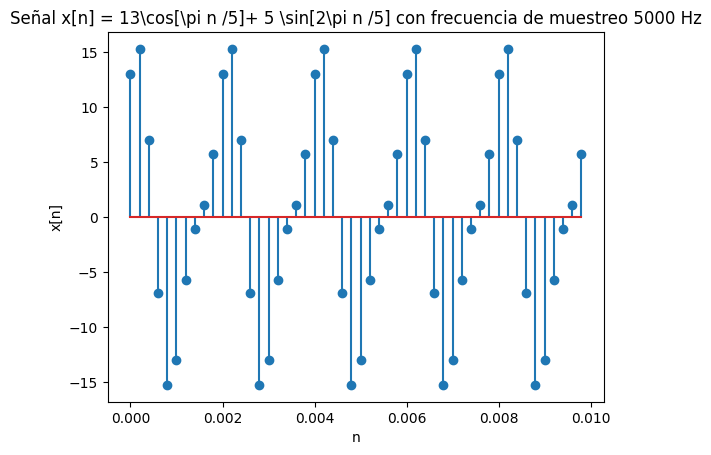

In [2]:
#graficar la señal discretizada
Fs=5000
n=np.arange(0,50)
x=13*np.cos(np.pi*n/5)+5*np.sin(2*np.pi*n/5)
plt.stem(n/Fs,x)
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('Señal x[n] = 13\cos[\pi n /5]+ 5 \sin[2\pi n /5] con frecuencia de muestreo 5000 Hz')
plt.show()

## Pregunta 3:

Implemente una simulación para encontrar la salida del sistema lineal e invariante al tiempo $\mathcal{H}\{\cdot\}$, con respuesta al escalón $h_\epsilon[n]=\{2,4,1,5,0,10\}$, $n\in\mathbb{Z}$, ante la entrada análoga $x(t)=20(\cos(t/3)+\cos(t/4))$. Incluya los acondicionamientos necesarios de discretización y cuantización, asumiendo un microprocesador de 4 bits con entrada análoga de 4mA a 20 mA.
**bold text**
## Solución:

Revisando la señal $x(t)$, se tiene que:

$\frac{\omega_1}{\omega_2} =\frac{1/3}{1/4} = \frac{4}{3} \in \mathbb{Q}$; por ende $x(t)$ es cuasiperiódica, con período:

$T_1 = \frac{2\pi}{\omega_1} = \frac{2\pi}{1/3} = 6\pi$

$T_2 = \frac{2\pi}{\omega_2} = \frac{2\pi}{1/4} = 8\pi$

$T = T_1 l = T_2 k$

$T = 6\pi l = 8\pi l$

con $k,l\in \mathbb{Z}.$ El $MCM(6,8)=24,$ así:

$\boxed{T = 24\pi [s]}$

Además, se requiere aplicar cero pendiente:

$\hat{x}(t)=m x(t)+ b$, con:

$m = \frac{\hat{x}_{max}(t)-\hat{x}_{min}(t)}{x_{max}(t)-x_{min}(t)}$

$b = \hat{x}_{min}(t)-m x_{min}(t)$

In [4]:
# función cero y pendiente
def my_ceropend(x, xhmax=20, xhmin=4):
    # cálculo de pendiente y cero
    # Calcula la pendiente m
    m = (xhmax - xhmin) / (x.max() - x.min())
    # Calcula el término independiente b
    b = xhmin - m * x.min()
    # Aplica la transformación lineal a los valores de entrada x
    xh = m * x + b
    # Retorna los valores transformados
    return xh

Se implementan los códigos de discretización y cuantización:

<ipython-input-5-56a7292572cc>:32: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1), ve))]  # cálculo de la distancia de cada punto al vector de estados


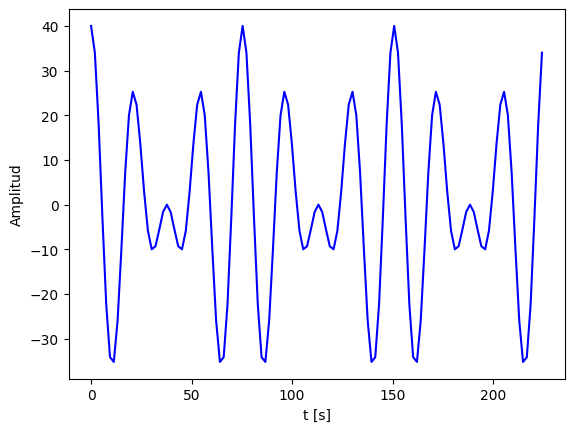

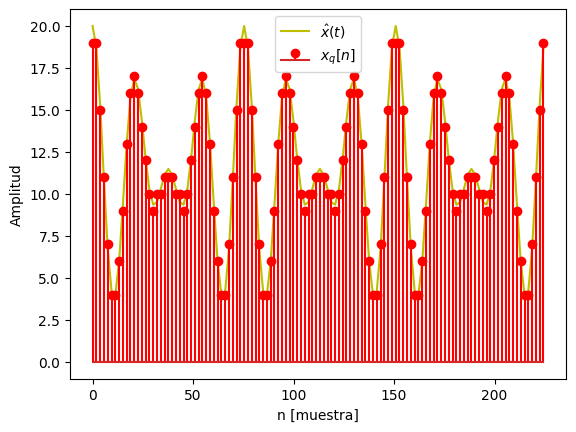

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# Definición de períodos y frecuencias de las señales
T1 = 6*np.pi  # período de la señal 1
T2 = 8*np.pi  # período de la señal 2
F1 = 1/T1    # frecuencia de la señal 1
F2 = 1/T2    # frecuencia de la señal 2
T = 24*np.pi  # período de la señal cuasiperiódica
Fs = 10*max(F1,F2)  # frecuencia de muestreo, asegura la superposición de las frecuencias
t = np.arange(0, 3*T, 1/Fs)  # vector de tiempo, muestra 3 períodos

# Generación de la señal x(t)
x = 20*(np.cos(t/3) + np.cos(t/4))

# Definición de rango de mapeo para cero y pendiente
xhmax = 20
xhmin = 4

# Aplicación de la función cero y pendiente a la señal x(t)
xh = my_ceropend(x, xhmax, xhmin).reshape(-1,1)  # asegurar vector columna

# Cuantización de la señal
nbits = 4  # número de bits
Ne = 2**nbits  # cantidad de estados (niveles de cuantización)
res = (xhmax - xhmin) / Ne  # resolución de cuantización
ve = np.arange(xhmin, xhmax, res).reshape(-1,1)  # vector de estados, asegurar vector columna

xq = np.zeros(len(xh))  # inicialización de la señal cuantizada
for i in range(len(xh)):  # recorrer la señal cero y pendiente
    xq[i] = ve[np.argmin(cdist(xh[i].reshape(-1,1), ve))]  # cálculo de la distancia de cada punto al vector de estados

# Gráficas de las señales
plt.plot(t, x, 'b', label='$x(t)$')  # señal original
plt.xlabel('t [s]')
plt.ylabel('Amplitud')
plt.show()

plt.plot(t, xh, 'y', label='$\hat{x}(t)$')  # señal cero y pendiente
plt.stem(t, xq, 'r', label='$x_{q}[n]$')  # señal cuantizada
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.legend()
plt.show()

para la salida del SLIT aplicando la convolución entre la entrada digital y la respuesta impulso. Dado que tenemos la respuesta escalón, calculamos la respuesta impulso como:

$h[n] = {\rm{diff}}[h_\epsilon[n]] = h_\epsilon[n]-h_\epsilon[n-1]$

In [6]:
he = np.array([2,4,1,5,0,10]) #respuesta al escalón del slit
h = np.diff(he)#respuesta al impulso del slit
print(h)

[ 2 -3  4 -5 10]


La salida del sistema se puede obtener entonces mediante la operación de convolución:

$y[n]=x[n]*h[n]=\sum_{k=-\infty}^{\infty}x[k]h[n-k]$

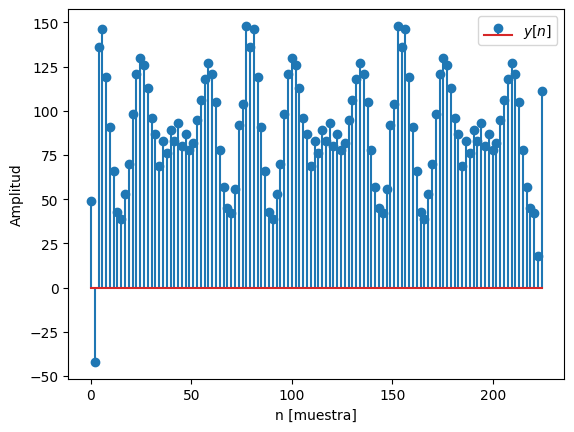

In [7]:
y = np.convolve(xq,h,mode='same')#respuesta del slit
#graficar señal
plt.stem(t,y,'p',label='$y[n]$')
plt.legend()
plt.xlabel('n [muestra]')
plt.ylabel('Amplitud')
plt.show()